# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Dalam capstone project kali ini, saya akan memplot pergerakan kurs USD terhadap waktu harian.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [203]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [204]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellis'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [205]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

membuat data tabel.

In [206]:
table = soup.find('tbody')
print(table.prettify()[1:500])

tbody>
 <tr>
  <td>
   7/9/2021
  </td>
  <td>
   Friday
  </td>
  <td>
   <a href="/Rate/USD/IDR/7-9-2021">
    14,499.31330
   </a>
   IDR
  </td>
  <td class="text-narrow-screen-hidden">
   <a href="/Rate/USD/IDR/7-9-2021">
    USD IDR rate for 7/9/2021
   </a>
  </td>
 </tr>
 <tr>
  <td>
   7/8/2021
  </td>
  <td>
   Thursday
  </td>
  <td>
   <a href="/Rate/USD/IDR/7-8-2021">
    14,515.87714
   </a>
   IDR
  </td>
  <td class="text-narrow-screen-hidden">
   <a href="/Rate/USD/IDR/7-8-2021


membuat data row dan mencari panjang row.

In [207]:
row = soup.find_all('tr', attrs={'class':''})
row_length = len(row)
row_length

130

melakukan proses scrapping atau memplot data

In [214]:
temp = [] #init

for i in range(0, row_length):
    
    # get tanggal
    tanggal = row[i].find_all('td', attrs={'class' : ''})[0].text
    
    # get harga_harian
    harga_harian = row[i].find_all('a', attrs={'class' : ''})[0].text
    harga_harian = harga_harian.strip() #to remove excess white space
    
    
    temp.append((tanggal,harga_harian)) 
    
temp

[('7/9/2021', '14,499.31330'),
 ('7/8/2021', '14,515.87714'),
 ('7/7/2021', '14,503.93654'),
 ('7/6/2021', '14,469.58258'),
 ('7/5/2021', '14,493.33968'),
 ('7/2/2021', '14,497.65100'),
 ('7/1/2021', '13,270.37815'),
 ('6/30/2021', '14,491.89811'),
 ('6/29/2021', '13,215.84052'),
 ('6/28/2021', '14,439.22236'),
 ('6/25/2021', '14,426.82283'),
 ('6/24/2021', '14,436.21247'),
 ('6/23/2021', '14,440.32729'),
 ('6/22/2021', '14,396.08712'),
 ('6/21/2021', '14,426.42481'),
 ('6/18/2021', '14,440.13691'),
 ('6/17/2021', '14,383.75138'),
 ('6/16/2021', '14,376.12040'),
 ('6/15/2021', '14,205.14512'),
 ('6/14/2021', '14,205.68458'),
 ('6/11/2021', '14,241.97728'),
 ('6/10/2021', '14,262.89225'),
 ('6/9/2021', '14,258.61758'),
 ('6/8/2021', '14,256.29978'),
 ('6/7/2021', '14,222.58206'),
 ('6/4/2021', '14,227.49966'),
 ('6/3/2021', '14,353.54834'),
 ('6/2/2021', '14,276.29774'),
 ('6/1/2021', '14,274.83728'),
 ('5/31/2021', '14,238.06947'),
 ('5/28/2021', '14,283.54665'),
 ('5/27/2021', '14,326

## Creating data frame & Data wrangling

Put the array into dataframe

In [293]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('tanggal','harga_harian'))
df.head()

,tanggal,harga_harian
0,7/9/2021,"14,499.31330"
1,7/8/2021,"14,515.87714"
2,7/7/2021,"14,503.93654"
3,7/6/2021,"14,469.58258"
4,7/5/2021,"14,493.33968"


mengganti tipe data

In [294]:
df['harga_harian'] = df['harga_harian'].str.replace(",","")
df['harga_harian'] = df['harga_harian'].astype('float64')
df['tanggal'] = df['tanggal'].astype('datetime64')

df

,tanggal,harga_harian
0,2021-07-09,14499.31330
1,2021-07-08,14515.87714
2,2021-07-07,14503.93654
3,2021-07-06,14469.58258
4,2021-07-05,14493.33968
...,...,...
125,2021-01-15,14153.46654
126,2021-01-14,14070.58746
127,2021-01-13,14125.90174
128,2021-01-12,14074.81444


In [295]:
df.dtypes

tanggal         datetime64[ns]
harga_harian           float64
dtype: object

men-set kolom tanggal menjadi index

In [296]:
df = df.set_index('tanggal')

In [300]:
df

,harga_harian
tanggal,
2021-07-09,14499.31330
2021-07-08,14515.87714
2021-07-07,14503.93654
2021-07-06,14469.58258
2021-07-05,14493.33968
...,...
2021-01-15,14153.46654
2021-01-14,14070.58746
2021-01-13,14125.90174


memplot data frame yang dimiliki untuk mendapatkan kurva pergerakan kurs USD terhadap waktu harian.

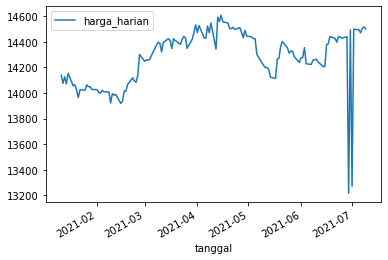

In [301]:
df.plot()

Saya mengimport data temp menggunakan lib. pandas menjadi df, kemudian menambahkan nama pada masing-masing kolomnya.
Setelah itu, merubah tipe data untuk kolom tanggal dari object menjadi datetime64[ns] dan untuk harga_harian dari object menjadi float64.
Selanjutnya men-set kolom tanggal sebagai index pada df.
Kemudian mem-plot data df yang dimiliki. 
Akhirnya tabel kurva pun didapat.

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

kita dapat mengambil data yang dapat diakses secara publik dari internet menggunakan beberapa library yang ada di jupyter notebook. pada kurva didapat fluktuasi kenaikan harga USD dari bulan 2 ke bulan 4, dan fluktuasi penurunan harga dari bulan 4 ke bulan 7. di bulan 7 terjadi 2x penurunan dan kenaikan kurs USD secara significant. 
kesimpulannya, kita dapat melakukan webscrapping menggunakan beautifulsoup dan library lainnya pada aplikasi Jupyter Notebook untuk mendapatkan data yang kita inginkan di internet, selagi data tersebut dapat diakses secara publik.


### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.